In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# read datset
exchange_rates = pd.read_csv('data/euro-daily-hist_1999_2020.csv')
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [2]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

---

Before we start creating data visualizations, we'll need to do a bit of data cleaning. Our focus in this part of the project will be on the exchange rate between the euro and the American dollar.

Lets do the following:
- Rename the [US dollar ] and Period\Unit: columns to something easier to type — US_dollar and Time.
- Change the Time column to a datetime data type.
- Sort the values by Time in ascending order.
- Reset the index (and drop the initial index).

---

In [3]:
# some basic data cleaning
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

# isolate 'Time' and 'US_dollar' columns
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]

# drop rows where '-' character appears in the 'US_dollar' column
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'].str.contains('-') == False]

# convert 'US_dollar' column to a float data type
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype('float64')

# calculate the rolling mean for the 'US_dollar' column using a moving window of 30 days
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

---

We will take a closer look at the Euro-USD exchange rates between the years 2006 and 2010 in order to see the effect that the 2007-2008 financial crisis had on the exchange rate.

---

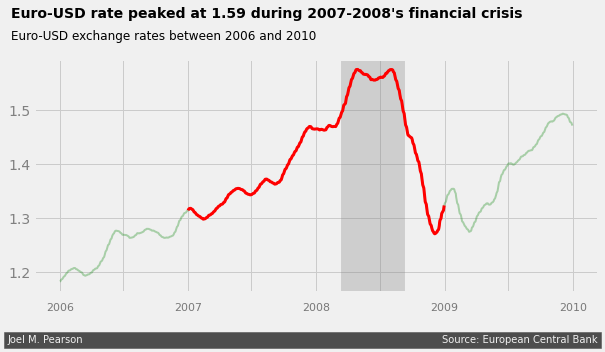

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')
import matplotlib.dates as mdates

# isolate data between 2006-2010 / 2007-2009
euro_to_dollar_2006_2010 = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2006) & (euro_to_dollar['Time'].dt.year < 2010)]
euro_to_dollar_2007_2009 = euro_to_dollar_2006_2010[(euro_to_dollar_2006_2010['Time'].dt.year >= 2007) & (euro_to_dollar_2006_2010['Time'].dt.year < 2009)]

# plot
fig, ax = plt.subplots(figsize=(9,4))
ax.plot(euro_to_dollar_2006_2010['Time'], euro_to_dollar_2006_2010['rolling_mean'], color='green', linewidth=2, alpha=0.3)
ax.plot(euro_to_dollar_2007_2009['Time'], euro_to_dollar_2007_2009['rolling_mean'], color='red', linewidth=3)
ax.axvspan(xmin=13950, xmax=14130, color='grey', alpha=0.3)  # highlight peak
ax.tick_params(colors='grey')  # change tick label colors

# adding separate x-tick labels
ax.set_xticklabels([])
x = 13110
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

# title and subtitle
ax.text(13010, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis", weight='bold')
ax.text(13010, 1.63, 'Euro-USD exchange rates between 2006 and 2010', size=12)

# adding a signature
ax.text(13000, 1.07, 'Joel M. Pearson' + ' '*115 + 'Source: European Central Bank', 
        color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=10)

plt.show()

---

Now we show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)).

---

In [5]:
# isolate each presidential period
bush  = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2009)]
obama = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2009) & (euro_to_dollar['Time'].dt.year < 2017)]
trump = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2017) & (euro_to_dollar['Time'].dt.year < 2021)]

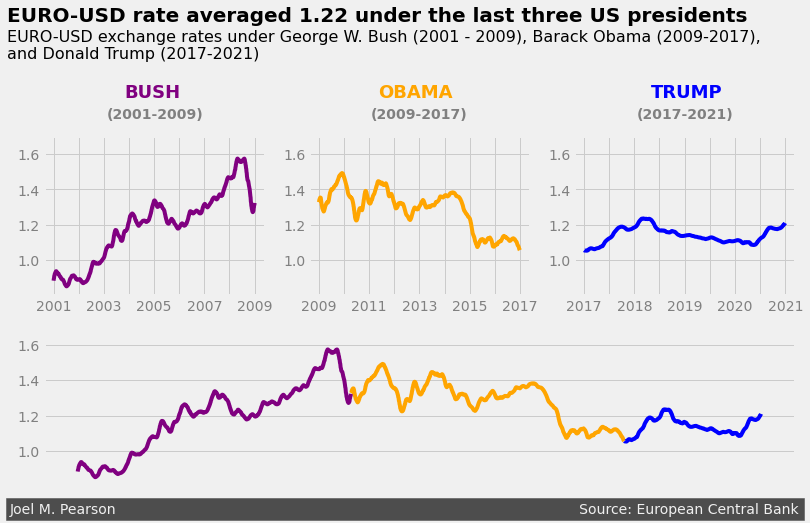

In [6]:
style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.tick_params(colors='grey')
    
# ax1 plot (bush)
ax1.plot(bush['Time'], bush['rolling_mean'], color='purple')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'])
ax1.text(12350, 1.92, 'BUSH', fontsize=18, weight='bold', color='purple')
ax1.text(12100, 1.8, '(2001-2009)', weight='bold', color='grey')

# ax2 plot (obama)
ax2.plot(obama['Time'], obama['rolling_mean'], color='orange')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'])
ax2.text(15100, 1.92, 'OBAMA', fontsize=18, weight='bold', color='orange')
ax2.text(15000, 1.8, '(2009-2017)', weight='bold', color='grey')

# ax3 plot (trump)
ax3.plot(trump['Time'], trump['rolling_mean'], color='blue')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'])
ax3.text(17650, 1.92, 'TRUMP', fontsize=18, weight='bold', color='blue')
ax3.text(17550, 1.8, '(2017-2021)', weight='bold', color='grey')

# ax4 plot (all)
ax4.plot(bush['Time'], bush['rolling_mean'], color='purple')
ax4.plot(obama['Time'], obama['rolling_mean'], color='orange')
ax4.plot(trump['Time'], trump['rolling_mean'], color='blue')
ax4.set_xticks([])

# title and subtitle
ax1.text(10650, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents', fontsize=20, weight='bold')
ax1.text(10650, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''', fontsize=16)

# adding a signature
ax4.text(10600, 0.65, 'Joel M. Pearson' + ' '*103 + 'Source: European Central Bank', 
         color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=14)

plt.show()

---

Some potential next steps include the following:

 - Creating a graph for a different currency.
 - Creating a graph for multiple currencies — perhaps I can compare their evolution.

---